In [5]:
import pandas as pd
import glob
import numpy as np
import os
import json
import matplotlib.pyplot as plt
#---------------------Training data---------------------------
path_train ='trainingDigits' # use your path
frame = pd.DataFrame()
frame_label=[]
list_frame_train = []
allFiles = glob.glob(path_train + "/*.txt")
for file in allFiles :
    a = np.loadtxt(file,dtype=np.str)
    temp = ""
    for i in range(len(a)) :
        temp = temp + a[i]
    data = pd.DataFrame(np.array([[int(x)] for x in temp]).T)
    list_frame_train.append(data)
    frame_label.append(os.path.basename(file)[0])
frame = pd.concat(list_frame_train)
#---------------------Testing data---------------------------
path_test ='testDigits' # use your path
frame_test = pd.DataFrame()
frame_label_test = []
list_frame_test = []
allFiles = glob.glob(path_test + "/*.txt")
for file in allFiles :
    a = np.loadtxt(file,dtype=np.str)
    temp = ""
    for i in range(len(a)) :
        temp = temp + a[i]
    data = pd.DataFrame(np.array([[int(x)] for x in temp]).T)
    list_frame_test.append(data)
    frame_label_test.append(os.path.basename(file)[0])
frame_test = pd.concat(list_frame_test)
print temp

0000000000000000001111110000000000000000000000001111111111000000000000000000001111111111110000000000000000001111111111111110000000000000000111111111111111000000000000000011111111001111110000000000000001111111000001111100000000000000111111100000111110000000000000001111110000001111000000000000000011111000000011110000000000000011111100000001111000000000000000111111000000011000000000000000000111111000000111111000000000000001111111000001111110000000000000011111111100011111100000000000000001111111111111110000000000000000000111111111111100000000000000000001111111111110000000000000000000000001111111100000000000000000000000000111111000000000000000000000000001111110000000000000000000000001111110000000000000000000000000011111100000000000000000000000001111110000000000000000000000000011111100000000000000000000000000111111000000000000000000000000001111110000000000000000000000000011111100000000000000000000000000111111000000000000000000000000001111110000000000000000000000000001111100000000000000000000

In [4]:
print "Trainging data frame : " + str(frame.shape)
print "Trainging data label : " + str(len(frame_label))
print "Testing data frame : " + str(frame_test.shape)
print "Testing data label : " + str(len(frame_label_test))

Trainging data frame : (1934, 1024)
Trainging data label : 1934
Testing data frame : (946, 1024)
Testing data label : 946


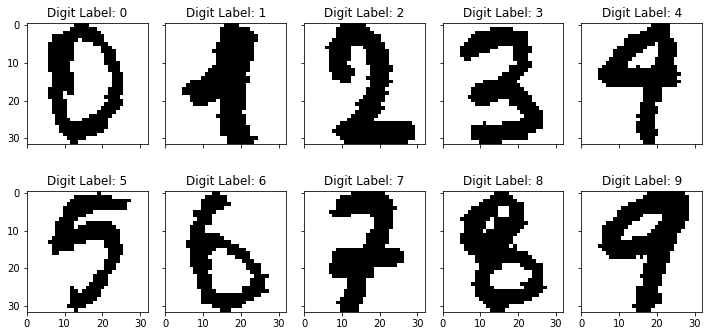

In [384]:
sample_labels = [0]
images_to_plot = 10
for index in range(len(frame_label)-1) :
    if frame_label[index]  != frame_label[index+1] :
        sample_labels.append(index+1)
sample_images = frame.iloc[sample_labels, :]
fig, axes = plt.subplots(2,5, 
                         figsize=(10,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal'))
for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//5
    subplot_col = i%5
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(sample_images.iloc[i,:].values, (32,32))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_title('Digit Label: {}'.format(i))
    ax.set_xbound([0,32])
plt.tight_layout()
plt.show()

In [476]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(frame, frame_label)
print "Training Error and Testing Error for Gaussian Naive Bayes Classifier"
print "Training Error : " + str(1-round(clf.score(frame, frame_label),5))
print "Testing Error : " + str(1-round(clf.score(frame_test, frame_label_test),5))

Training Error and Testing Error for Gaussian Naive Bayes Classifier
Training Error : 0.20838
Testing Error : 0.26638


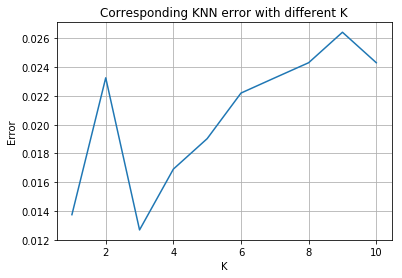

In [478]:
from sklearn.neighbors import KNeighborsClassifier
k = [x for x in range(1,11)]
Error = []
for i in range(len(k)) :
    neigh = KNeighborsClassifier(n_neighbors=k[i])
    neigh.fit(frame, frame_label)
    Error.append(1-round(neigh.score(frame_test, frame_label_test),5))
plt.plot(k,Error)
plt.title("Corresponding KNN error with different K")
plt.xlabel("K")
plt.ylabel("Error")
plt.grid()
plt.show()

In [467]:
num = [x*100 for x in range(1,19)]
ERROR_NBC_train = []
ERROR_NBC_test = []
ERROR_1NN_train = []
ERROR_1NN_test = []
for i in range(len(num)) :
    #----------------------BNC----------------------------------------------------
    clfs = GaussianNB()
    clfs.fit(frame.iloc[0:num[i],:], frame_label[0:num[i]])
    ERROR_NBC_train.append((1-round(clfs.score(frame.iloc[0:num[i],:], frame_label[0:num[i]]),5)))
    ERROR_NBC_test.append((1-round(clfs.score(frame_test, frame_label_test),5)))
    #----------------------1NN----------------------------------------------------
    neighs = KNeighborsClassifier(n_neighbors=1)
    neighs.fit(frame.iloc[0:num[i],:], frame_label[0:num[i]])
    ERROR_1NN_train.append(1-round(neighs.score(frame.iloc[0:num[i],:], frame_label[0:num[i]]),5))
    ERROR_1NN_test.append(1-round(neighs.score(frame_test, frame_label_test),5))

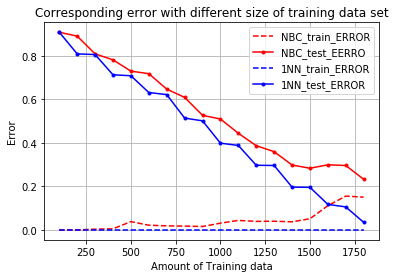

In [481]:
plt.plot(num,ERROR_NBC_train,'r--',label = "NBC_train_ERROR")
plt.plot(num,ERROR_NBC_test,'r.-',label = "NBC_test_EERRO")
plt.plot(num,ERROR_1NN_train,'b--',label = "1NN_train_ERROR")
plt.plot(num,ERROR_1NN_test,'b.-',label = "1NN_test_ERROR")
plt.legend(loc = 'upper right')
plt.title("Corresponding error with different size of training data set")
plt.xlabel("Amount of Training data")
plt.ylabel("Error")
plt.grid()
plt.show()